<a href="https://colab.research.google.com/github/maxenlee/Deep-Dive/blob/main/Maxen_Housing_Description_for_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Housing Price Prediction


The project should be done using Regression prediction techniques ( with feature scaling and regularization ) as covered in class.
The goal is to minimize the RMS ***percentage*** error ( root mean squared percentage error - RMSPE ) on your prediction of the house sales price.



Any of the available features can be used in the regression, but a minimum set of variables that do the job should be the ultimate goal.



Be sure to go through the whole data science process and document as such in your Jupyter notebook.



This project will have less direct "To Do" guidance and the progression through the data science process will be more individualized this time around.
We will talk about all the issues during class so you're not going to be out on a ledge with this one, I just want to move you towards performing a data science project on your own eventually.



Also in the class Google drive at “Project 2” folder is a data dictionary file called "Housing - Data Documentation.pdf" that explains the features in the data set.



The data is available on AWS S3 at https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Housing.Data.csv .


In [ ]:
!pip install pymupdf

In [ ]:
!git clone https://github.com/maxenlee/DataScienceToolBox


fatal: destination path 'DataScienceToolBox' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import sys
sys.path.append('/content/DataScienceToolBox')
from ToolBox import DataFrameAnalyzer
#there will be an warning

In [ ]:
import seaborn as sns


In [ ]:
import numpy as np
import pandas as pd
#visualizations
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
#Model Fitting and featue selection
from sklearn import datasets
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#Model performance comparison and analyzation

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, accuracy_score
import scipy.stats as stats


import  fitz
import re


In [ ]:
df = pd.DataFrame(pd.read_csv('https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Housing.Data.csv'))
columns = list(df.columns)
df


,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,903231070,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,400,9,2006,WD,Normal,114500
2633,906201021,80,RL,74.0,10778,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,162000
2634,533253070,120,RL,61.0,3782,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,211500
2635,527376100,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,165000


In [ ]:
df.df_kit.analyze()

rows                  2637
columns                 81
int64                   27
object                  43
float64                 11
Nulls                12624
Unique               14289
Size                213597
Deep(Bytes)        7349115
Shallow (Bytes)    1708904
dtype: int64

In [ ]:
# variable_types = {
#     'nominal': [
#         'PID', 'MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour',
#         'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
#         'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
#         'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type',
#         'Misc Feature', 'Sale Type', 'Sale Condition'
#     ],
#     'ordinal': [
#         'Lot Shape', 'Utilities', 'Land Slope', 'Exter Qual', 'Exter Cond',
#         'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
#         'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu',
#         'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC',
#         'Fence', 'Overall Qual', 'Overall Cond'  # Included 'Overall Qual' and 'Overall Cond' here
#     ],
#     'discrete': [
#         'Year Built', 'Year Remod/Add', 'Bsmt Full Bath', 'Bsmt Half Bath',
#         'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
#         'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Mo Sold', 'Yr Sold'
#     ],
#     'continuous': [
#         'Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
#         'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
#         'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
#         '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice'
#     ]
# }


In [ ]:
# def split_dataframes_by_type(df, variable_types):
#     dataframes = {}

#     for var_type, columns in variable_types.items():
#         # Select only the columns specified in the dictionary for each variable type
#         dataframes[var_type] = df[columns]

#     return dataframes

# # Example usage:
# # Assuming `df` is your DataFrame loaded from the data file
# dataframes = split_dataframes_by_type(df, variable_types)

# # Accessing the separated DataFrames
# nominal_df = dataframes['nominal']
# ordinal_df = dataframes['ordinal']
# discrete_df = dataframes['discrete']
# continuous_df = dataframes['continuous']


In [ ]:
# df.columns

In [ ]:
# nominal_df['MS SubClass'].count()

In [ ]:
# corr.unstack().sort_values(kind ='quicksort',ascending = False)


In [ ]:
# Install the required package for fuzzy string matching
!pip install fuzzywuzzy

# Import necessary libraries
import fitz  # PyMuPDF for handling PDF files
import re  # Regular expressions for pattern matching
from fuzzywuzzy import process  # Fuzzy string matching
import pandas as pd  # Pandas for data manipulation

# Load your DataFrame here (replace 'your_dataframe.csv' with your actual file)
# df = pd.read_csv("your_dataframe.csv")

# Open the PDF document containing data documentation
doc = fitz.open("Housing - Data Documentation.pdf")

# Read text from each page of the PDF document
text_from_pdf = ""
for page in doc:
    text_from_pdf += page.get_text()

# Define patterns to identify variable names and their types (Nominal, Continuous, etc.)
variable_patterns = {
    "Nominal": r"\n(.*?)\s*\((Nominal)\):",
    "Continuous": r"\n(.*?)\s*\((Continuous)\):",
    "Ordinal": r"\n(.*?)\s*\((Ordinal)\):",
    "Discrete": r"\n(.*?)\s*\((Discrete)\):"
}

# Extract variable names based on their types
extracted_variables = {}
for var_type, pattern in variable_patterns.items():
    found_variables = re.findall(pattern, text_from_pdf, re.IGNORECASE)
    extracted_variables[var_type] = [var[0].strip() for var in found_variables]

# Function to perform fuzzy matching of extracted variable names against DataFrame columns
def match_columns_to_types(dataframe, extracted_vars, match_threshold=60):
    column_matches = {var_type: [] for var_type in extracted_vars}
    for column in dataframe.columns:
        for var_type, variables in extracted_vars.items():
            best_match, match_score = process.extractOne(column, variables)
            if match_score >= match_threshold:
                column_matches[var_type].append(column)
                break  # Stop if the best match is found for a category
    return column_matches

# Fuzzy match DataFrame columns to extracted variable types
matched_columns_to_types = match_columns_to_types(df, extracted_variables, 60)

# Split the original DataFrame into separate DataFrames for each variable type
dfs_by_type = {var_type: df[matched_columns] for var_type, matched_columns in matched_columns_to_types.items() if matched_columns}

# Now, dataframes_by_type contains separate DataFrames categorized by variable type


In [ ]:
for i in dfs_by_type:
  print(dfs_by_type[i].columns)

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Street', 'Alley',
       'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Cond', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Cond',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Functional', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Garage Cond', 'Screen Porch', 'Misc Feature', 'Misc Val', 'Sale Type',
       'Sale Condition', 'SalePrice'],
      dtype='object')
Index(['Lot Area', 'Lot Shape', 'Bsmt Qual', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Pool Area', 'Pool QC'],
  

In [ ]:
dfs_by_type['Nominal'].copy().select_dtypes(exclude=['object']).isna().sum()

PID                0
MS SubClass        0
Lot Frontage     449
Overall Cond       0
Mas Vnr Area      23
Garage Yr Blt    147
Garage Cars        1
Garage Area        1
Screen Porch       0
Misc Val           0
SalePrice          0
dtype: int64

In [ ]:
dfs_by_type['Ordinal'].select_dtypes(exclude=['object'])

,Overall Qual,Bsmt Full Bath,Bsmt Half Bath,Kitchen AbvGr,Fireplaces
0,4,1.0,0.0,1,0
1,4,0.0,0.0,2,0
2,6,0.0,0.0,1,1
3,8,1.0,0.0,1,1
4,7,1.0,0.0,1,0
...,...,...,...,...,...
2632,6,0.0,0.0,1,1
2633,7,1.0,0.0,1,0
2634,8,1.0,0.0,1,2
2635,6,0.0,0.0,1,1


In [ ]:
df_numerical = pd.concat([dfs_by_type['Discrete'].select_dtypes(exclude=['object']) ,dfs_by_type['Continuous'].select_dtypes(exclude=['object']),dfs_by_type['Ordinal'].select_dtypes(exclude=['object']),dfs_by_type['Nominal'].select_dtypes(exclude=['object'])],axis=1)#dfs_by_type['Nominal']['SalePrice']],axis= 1)

In [ ]:

df_numerical.drop(columns =['Lot Frontage','Garage Yr Blt'],inplace=True)

In [ ]:
df_numerical.isna().sum()

Year Built          0
Year Remod/Add      0
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
TotRms AbvGrd       0
Mo Sold             0
Yr Sold             0
Lot Area            0
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
1st Flr SF          0
2nd Flr SF          0
Low Qual Fin SF     0
Gr Liv Area         0
Wood Deck SF        0
Open Porch SF       0
Enclosed Porch      0
3Ssn Porch          0
Pool Area           0
Overall Qual        0
Bsmt Full Bath      2
Bsmt Half Bath      2
Kitchen AbvGr       0
Fireplaces          0
PID                 0
MS SubClass         0
Overall Cond        0
Mas Vnr Area       23
Garage Cars         1
Garage Area         1
Screen Porch        0
Misc Val            0
SalePrice           0
dtype: int64

In [ ]:
df_numerical.shape

(2637, 36)

In [ ]:
# df_numerical.drop(['Bsmt Qual','Pool QC','Lot Shape'],axis=1,inplace=True)
df_numerical.dropna(axis=0,inplace=True)

<Axes: >

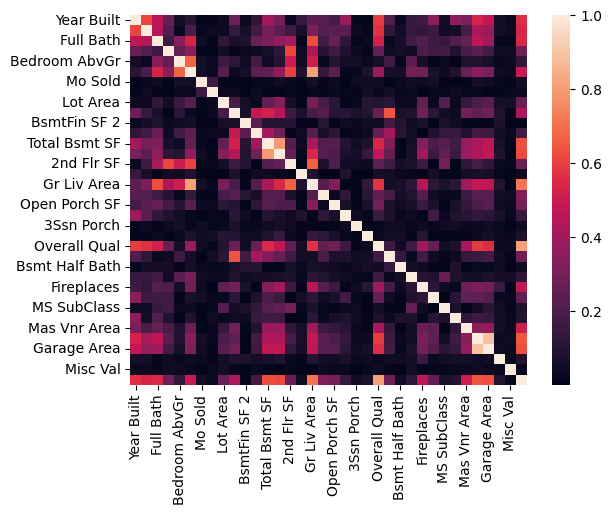

In [ ]:
# calculate the correlation matrix on the numeric columns
corr = df_numerical.corr().abs()

# plot the heatmap
sns.heatmap(corr)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming df_numerical is your DataFrame with numerical features

# Preparing the data
X = df_numerical.drop(columns=['SalePrice'])  # Predictors
y = df_numerical['SalePrice']  # Target variable

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=420, test_size=0.2, shuffle=True)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)  # Training the model

# Making predictions
y_pred = model.predict(X_test)

# Evaluation Metrics for Regression
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
print("\nMean Squared Error on Test Set:", mse)

# If you're interested in R² score (coefficient of determination)
r2_score = model.score(X_test, y_test)
print("\nR² Score on Test Set:", r2_score)

from sklearn.model_selection import cross_val_score

# Performing 10-fold cross-validation using MSE as the scoring metric
scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')

# Convert scores to positive; cross_val_score returns negative values for MSE to maximize the score when using optimization algorithms
mse_scores = -scores
print()
print(f"Mean MSE across 10 folds: {mse_scores.mean()}")



Mean Squared Error on Test Set: 936404815.0990599

R² Score on Test Set: 0.8551779415313036

Mean MSE across 10 folds: 1072641639.5539662


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming df_numerical is your DataFrame with numerical features

# Preparing the data
X = df_numerical.drop(columns=['SalePrice'])  # Predictors
y = df_numerical['SalePrice']  # Target variable

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=420, test_size=0.2, shuffle=True)

# Linear Regression Model
model = Lasso(alpha=1)
selector = RFE(model, n_features_to_select=10, step=1)
model.fit(X_train, y_train)  # Training the model

# Making predictions
y_pred = model.predict(X_test)

# Evaluation Metrics for Regression
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
print("\nMean Squared Error on Test Set:", mse)

# If you're interested in R² score (coefficient of determination)
r2_score = model.score(X_test, y_test)
print("\nR² Score on Test Set:", r2_score)

from sklearn.model_selection import cross_val_score

# Performing 10-fold cross-validation using MSE as the scoring metric
scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')

# Convert scores to positive; cross_val_score returns negative values for MSE to maximize the score when using optimization algorithms
mse_scores = -scores
print()
print(f"Mean MSE across 10 folds: {mse_scores.mean()}")

print("Coefficients:", model.coef_)
# Features with non-zero coefficients are selected by the Lasso model




Mean Squared Error on Test Set: 936399597.9147928

R² Score on Test Set: 0.8551787484081508

Mean MSE across 10 folds: 1072625539.5186284
Coefficients: [ 3.21272187e+02  2.19033559e+02  9.99464237e+02 -1.72396164e+03
 -1.02773229e+04  4.92203450e+03  1.12553469e+02 -7.22144390e+02
  3.03366267e-01  2.19330199e+01  1.02209264e+01  5.71428825e+00
  3.58877614e+00  4.52311739e+01  4.31623024e+01  2.61988438e+01
  7.14029699e+00  1.68213860e+01 -7.10947129e+00  2.18589144e+01
  1.73953666e+01 -3.31420443e+01  1.72335027e+04  7.67368175e+03
 -2.79530129e+03 -8.92012642e+03  3.06674536e+03 -3.72878078e-06
 -1.48952208e+02  3.39418686e+03  3.46990555e+01  7.51714199e+03
  3.15107334e+00  5.05628169e+01 -2.76691219e-01]


In [ ]:
df_numerical

,Year Built,Year Remod/Add,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Mo Sold,Yr Sold,Lot Area,BsmtFin SF 1,...,Fireplaces,PID,MS SubClass,Overall Cond,Mas Vnr Area,Garage Cars,Garage Area,Screen Porch,Misc Val,SalePrice
0,1964,1964,1,0,3,5,7,2007,14299,513.0,...,0,905101070,20,3,0.0,2.0,440.0,0,0,115400
1,1967,1967,2,0,2,6,10,2006,10791,0.0,...,0,905101330,90,5,0.0,2.0,516.0,0,500,90000
2,1937,1950,1,1,3,6,12,2007,9000,0.0,...,1,903454090,50,6,0.0,1.0,544.0,126,0,141000
3,2000,2000,2,1,3,7,4,2010,7379,484.0,...,1,533244030,60,5,0.0,2.0,592.0,0,0,254000
4,1936,2007,1,0,3,6,4,2009,7200,350.0,...,0,909252020,70,9,0.0,2.0,576.0,0,0,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,1934,1950,1,0,3,6,9,2006,6240,0.0,...,1,903231070,50,6,0.0,2.0,528.0,0,400,114500
2633,1990,1991,1,1,1,4,7,2009,10778,460.0,...,0,906201021,80,6,0.0,2.0,462.0,0,0,162000
2634,1981,1981,1,0,1,4,9,2009,3782,960.0,...,2,533253070,120,5,0.0,2.0,484.0,0,0,211500
2635,1974,1974,2,0,3,7,8,2009,10140,0.0,...,1,527376100,20,5,174.0,2.0,478.0,0,0,165000


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming df_numerical is your DataFrame with numerical features

# Preparing the data
X = df_numerical.drop(columns=['SalePrice'])  # Predictors
y = df_numerical['SalePrice']  # Target variable

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=420, test_size=0.2, shuffle=True)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)  # Training the model

# Making predictions
y_pred = model.predict(X_test)

# Evaluation Metrics for Regression
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
print("\nMean Squared Error on Test Set:", mse)

# If you're interested in R² score (coefficient of determination)
r2_score = model.score(X_test, y_test)
print("\nR² Score on Test Set:", r2_score)

from sklearn.model_selection import cross_val_score

# Performing 10-fold cross-validation using MSE as the scoring metric
scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')

# Convert scores to positive; cross_val_score returns negative values for MSE to maximize the score when using optimization algorithms
mse_scores = -scores
print()
print(f"Mean MSE across 10 folds: {mse_scores.mean()}")



Mean Squared Error on Test Set: 936404815.0990599

R² Score on Test Set: 0.8551779415313036

Mean MSE across 10 folds: 1072641639.5539662


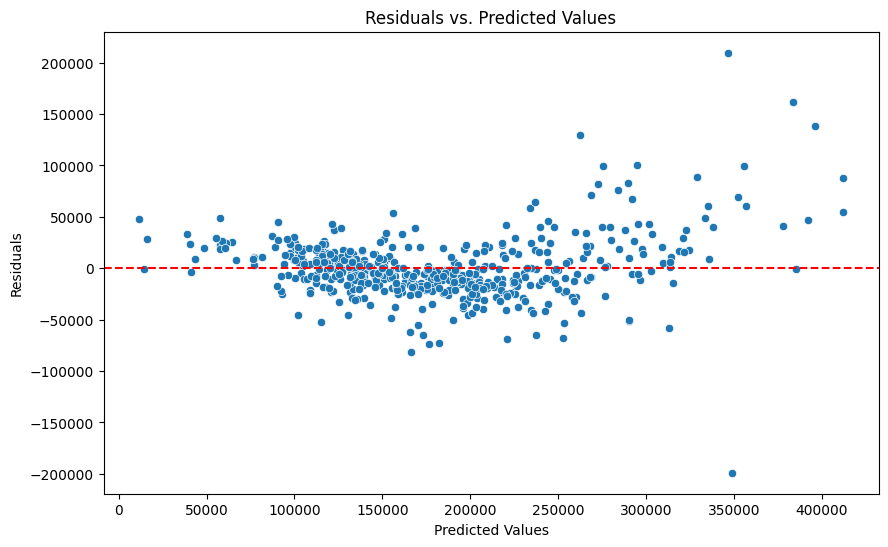

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plotting the residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


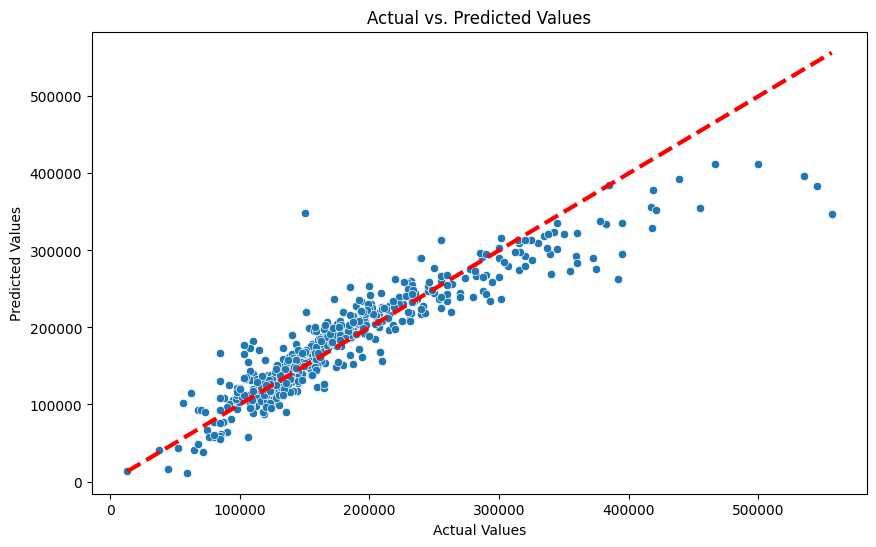

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


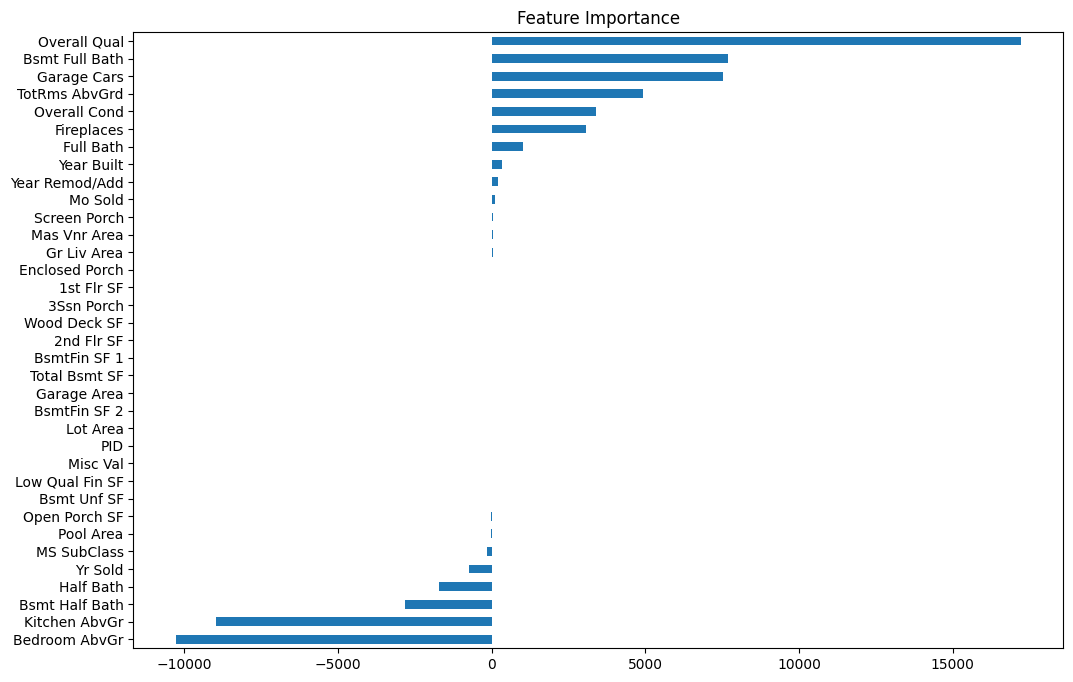

In [ ]:
# Ensure features are standardized if they're not already, for a fair comparison of coefficients
coefficients = model.coef_
features = X_train.columns

# Plot
plt.figure(figsize=(12, 8))
coeff_importance = pd.Series(coefficients, index=features).sort_values()
coeff_importance.plot(kind='barh')
plt.title('Feature Importance')
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Assuming 'model' is your trained model, and 'X_train' is your training data

# Convert coefficients to absolute values for comparison
abs_coefficients = np.abs(model.coef_)

# Create a Series for coefficients with the index being the feature names
coeff_importance = pd.Series(abs_coefficients, index=X_train.columns)

# Sort the series to identify features with the least importance
sorted_coeff = coeff_importance.sort_values()

# Decide on a threshold for dropping features. For example, the bottom 10%.
n_drop = int(0.5 * len(sorted_coeff))  # Adjust this percentage as needed
features_to_drop = sorted_coeff.head(n_drop).index.tolist()

# Print the features to drop
print("Features to drop based on the least importance:", features_to_drop)

# # Drop these features from your DataFrame
# X_train_reduced = X_train.drop(columns=features_to_drop)
# X_test_reduced = X_test.drop(columns=features_to_drop)  # Assuming you have a test set

# # Now, X_train_reduced and X_test_reduced have the features with the least importance dropped
df_dropped = df_numerical.drop(columns=features_to_drop)

Features to drop based on the least importance: ['PID', 'Misc Val', 'Lot Area', 'Low Qual Fin SF', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Garage Area', 'Open Porch SF', 'Total Bsmt SF', 'BsmtFin SF 1', '2nd Flr SF', 'Wood Deck SF', '3Ssn Porch', '1st Flr SF', 'Enclosed Porch', 'Pool Area', 'Gr Liv Area']


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming df_numerical is your DataFrame with numerical features

# Preparing the data
X = df_dropped.drop(columns=['SalePrice'])  # Predictors
y = df_numerical['SalePrice']  # Target variable

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=420, test_size=0.2, shuffle=True)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)  # Training the model

# Making predictions
y_pred = model.predict(X_test)

# Evaluation Metrics for Regression
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
print("\nMean Squared Error on Test Set:", mse)

# If you're interested in R² score (coefficient of determination)
r2_score = model.score(X_test, y_test)
print("\nR² Score on Test Set:", r2_score)

from sklearn.model_selection import cross_val_score

# Performing 10-fold cross-validation using MSE as the scoring metric
scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')

# Convert scores to positive; cross_val_score returns negative values for MSE to maximize the score when using optimization algorithms
mse_scores = -scores
print()
print(f"Mean MSE across 10 folds: {mse_scores.mean()}")



Mean Squared Error on Test Set: 1258684222.543886

R² Score on Test Set: 0.8053350034818083

Mean MSE across 10 folds: 1227671424.0513682


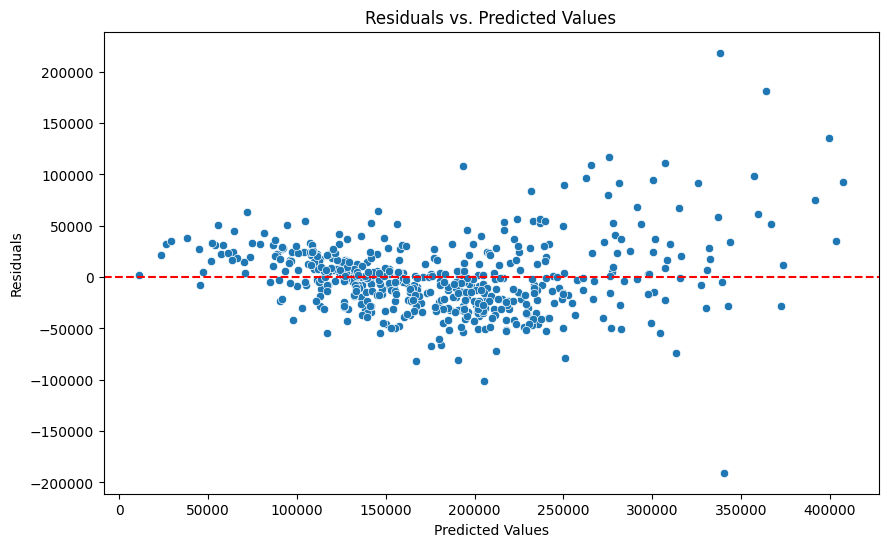

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plotting the residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


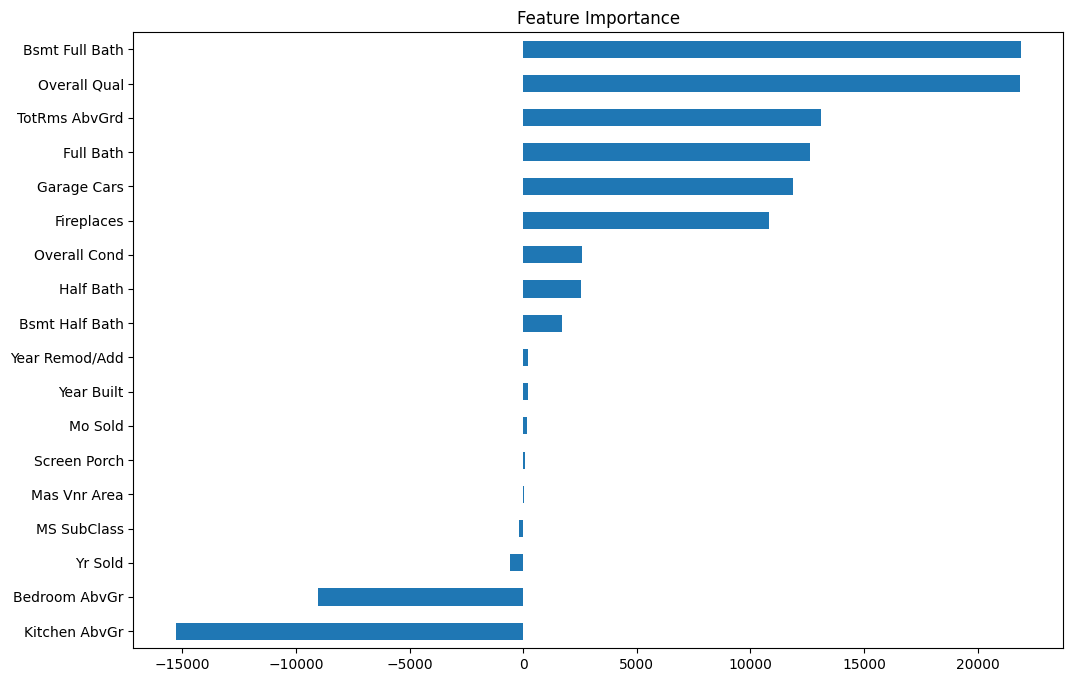

In [ ]:
# Ensure features are standardized if they're not already, for a fair comparison of coefficients
coefficients = model.coef_
features = X_train.columns

# Plot
plt.figure(figsize=(12, 8))
coeff_importance = pd.Series(coefficients, index=features).sort_values()
coeff_importance.plot(kind='barh')
plt.title('Feature Importance')
plt.show()
